This is the second example about diffusion. In this one, we will show that diffusion, coupled with degradation and non-uniform synthesis, can result in concentration gradients.

The code for this example is mostly identical to that of the previous example, therefore we will only explain the parts that differ from the previous example.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 1, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.05 s)


## Biological species

In [4]:
sim.register_cell_variable("a")

## Constants

In this example, we introduce three additional constants. *mu_a* is the degradation rate and *A* is the synthesis rate of *a*. *s* is a vector defining which cells do actually synthesize *a* (only the first cell, cell 0).

In [5]:
s = np.zeros(20)
s[0] = 1
sim.set_constants({"D_a": 100., "mu_a": 1., "A": 1., "s": s})

## Differential equations

This time, the differential equation governing *a* is slightly more complex, as it includes a degradation term and a synthesis term.

In [6]:
def da_dt(simulation, a, c_a, D_a, mu_a, A, s, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) - mu_a * a + A * s

sim.set_ODE("a", da_dt)

## Initial conditions

In [7]:
sim.initialize_cell_variables()

a0 = np.zeros(20)
a0[0] = 20

sim.set_cell_variable("a", a0)

## Duration

In [8]:
sim.set_duration(1e7)

## Rendering

In [9]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "a")

# Visualization of the initial state

<IPython.core.display.Javascript object>


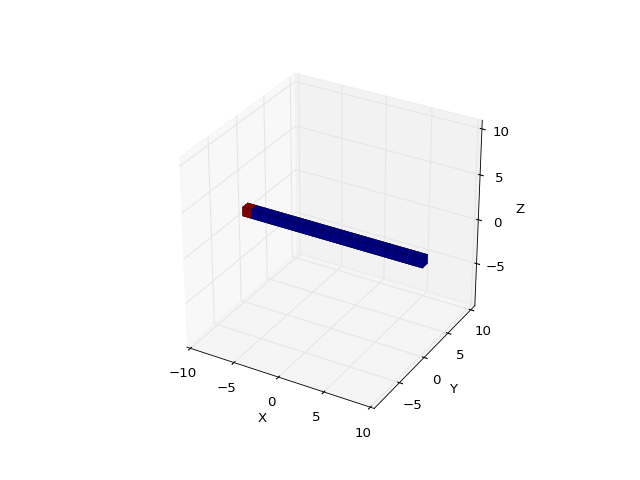

a: from 0.0 to 20.0038864711


In [10]:
sim.renderer.display("a")

# Simulation

Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.63963508606 seconds


<IPython.core.display.Javascript object>


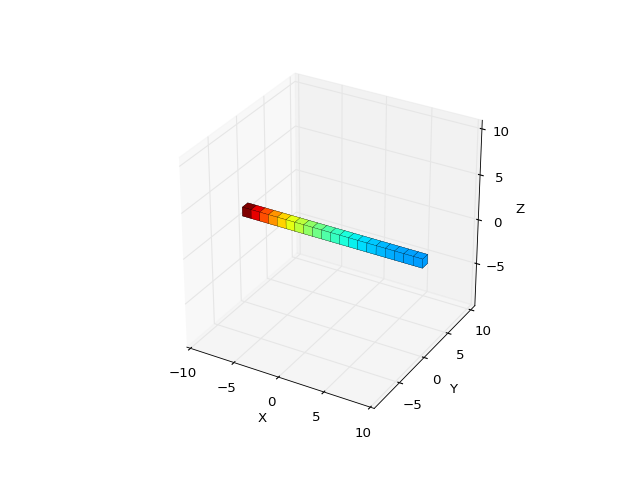

a: from 0.0276329238534 to 0.0988799988596


In [11]:
sim.simulate()

In this example, concentrations are no longer uniform at the steady state, as a result of the turnover of species `a`, which we introduced through the synthesis and degradation terms.

The competition between diffusion and turnover leads to the formation of concentration gradients around the source of the species. The steepness of the gradient depends on diffusion and turnover rates, relative to each other. The faster the diffusion and the slower the turnover, the smoother the gradient.

Changing the values of `D_a`, `A` and `mu_a` will affect the steady state. The `A` / `mu_a` ratio determines the total amount of `a` in the tissue. Increasing values of `A` and `mu_a` will increase the turnover rate, while increasing the value of `D_a` will increase the diffusion rate.